In [ ]:
import random 
import multiprocessing
import numpy as np 
from deap import base, creator, tools, algorithms 

import matplotlib.pyplot as plt 

In [ ]:
pool = multiprocessing.Pool()

In [2]:
puzzle = np.array([
    [0, 0, 0, 5, 9, 0, 0, 3, 7],
    [0, 7, 9, 0, 3, 2, 0, 8, 0],
    [0, 0, 8, 7, 0, 0, 0, 0, 0],
    [3, 0, 0, 0, 0, 1, 6, 2, 0],
    [0, 9, 0, 0, 0, 6, 3, 7, 0],
    [7, 2, 0, 3, 0, 0, 1, 5, 8],
    [0, 0, 0, 0, 0, 7, 8, 6, 5],
    [0, 8, 7, 0, 1, 0, 2, 4, 0],
    [0, 5, 4, 6, 0, 0, 7, 0, 0]
])

fixed_positions = (puzzle != 0) 

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [4]:
def evaluate(individual): 
  grid = np.array(individual).reshape(9, 9) 
  conflicts = 0 
  
  for row in grid:
    conflicts += (9 - len(set(row)))
    
  for col in grid.T: 
    conflicts += (9 - len(set(col)))
    
  for i in range(0, 9, 3): 
    for j in range(0, 9, 3):
      block = grid[i:i+3, j:j+3].flatten() 
      conflicts += (9 - len(set(block))) 
  
  return (conflicts,)


def generate_individual():
    individual = puzzle.copy()
    for i in range(9):
        missing = list(set(range(1, 10)) - set(puzzle[i]))
        np.random.shuffle(missing)
        idx = 0
        for j in range(9):
            if individual[i, j] == 0:
                individual[i, j] = missing[idx]
                idx += 1
    return individual.flatten().tolist()


In [5]:
# pool = multiprocessing.Pool()
toolbox = base.Toolbox()
# toolbox.register("map", pool.map)

toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=5)

In [6]:
def visualize(grid):
    plt.imshow(grid, cmap="coolwarm", alpha=0.6)
    for i in range(9):
        for j in range(9):
            plt.text(j, i, str(grid[i, j]), ha='center', va='center', fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.show()

gen	nevals	avg  	std 	min	max
0  	5000  	40.56	4.24	27 	56 
1  	3953  	56.44	20.31	23 	93 
2  	3999  	56.52	20.73	23 	95 
3  	3963  	55.79	21.33	22 	93 
4  	3987  	55.98	21.89	21 	97 
5  	3972  	55.16	22.3 	21 	96 
6  	4011  	54.42	22.86	19 	95 
7  	4008  	54.12	23.18	18 	93 
8  	4016  	53.81	23.83	18 	95 
9  	4001  	52.78	24.38	18 	96 
10 	4002  	51.93	24.79	15 	92 
11 	4047  	51.97	25.53	13 	93 
12 	4044  	52.09	26.08	14 	99 
13 	4001  	49.98	26.68	11 	95 
14 	4001  	49.38	27.35	11 	94 
15 	3981  	48.97	27.86	11 	95 
16 	4021  	48.23	28.42	10 	96 
17 	3998  	47.78	29.17	10 	92 
18 	3959  	46.77	29.51	9  	92 
19 	4002  	46.6 	30.09	8  	96 
20 	4028  	46.38	30.51	8  	98 
21 	4001  	45.51	30.81	7  	93 
22 	4014  	46.05	31.2 	6  	96 
23 	3968  	44.24	31.46	6  	93 
24 	4008  	44.52	31.87	5  	94 
25 	4008  	44.4 	32.25	4  	97 
26 	4002  	44.03	32.57	4  	93 
27 	3979  	42.95	32.99	3  	94 
28 	4021  	43.42	33.39	3  	97 
29 	3997  	42.08	33.7 	2  	94 
30 	3945  	41.15	33.99	2  	91 
31 	4034  

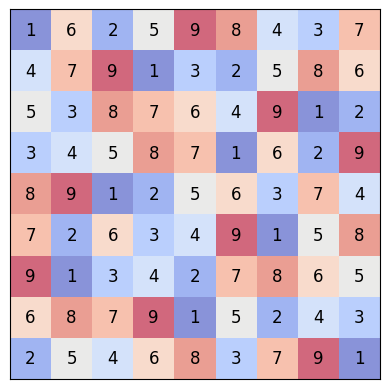

In [ ]:
random.seed(42)
pop = toolbox.population(n=5000)
hof = tools.HallOfFame(1)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", lambda vals: round(np.mean([v[0] for v in vals]), 2))
stats.register("std", lambda vals: round(np.std([v[0] for v in vals]), 2))
stats.register("min", lambda vals: round(min(v[0] for v in vals), 2))
stats.register("max", lambda vals: round(max(v[0] for v in vals), 2))


pop, logbook = algorithms.eaSimple(
  pop, 
  toolbox, 
  cxpb=0.6, 
  mutpb=0.50, 
  ngen=200, 
  stats=stats, 
  halloffame=hof, 
  verbose=True)


best_ind = hof[0]
best_value = best_ind.fitness.values[0]
print(f"Hall of Fame (HOF) Best Individual:  {best_ind}")
print(f"Hall of Fame Fitness: {best_value}")
visualize(np.array(best_ind).reshape(9, 9))

pool.close() 
pool.join()


In [9]:
def is_valid_sudoku(grid): 
  for i in range(9): 
    if len(set(grid[i, :])) < 9: 
      return False
    if len(set(grid[:, i])) < 9:
      return False 
    
  for r in range(0, 9, 3): 
    for c in range(0, 9, 3): 
      subgrid = grid[r:r+3, c:c+3].flatten() 
      if len(set(subgrid)) < 9: 
        return False 
      
  return True 

best_solution = np.array(hof[0]).reshape(9, 9)
if is_valid_sudoku(best_solution):
    print("✅ The GA successfully solved the Sudoku puzzle!")
else:
    print("❌ The solution is incorrect.")
    

✅ The GA successfully solved the Sudoku puzzle!
